In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
sns.set_style('darkgrid')
import os
from collections import defaultdict

In [7]:
file_list = os.listdir('../data/chengdu2/')
file_dict= defaultdict(list)

In [9]:
for i in file_list:
    tage_li = i.split('_')
    file_dict[tage_li[1]].append(i)

In [11]:
file_dict['2016.08.08']

['demand_2016.08.08_510100_.csv',
 'distribute_2016.08.08_510100_.csv',
 'money_2016.08.08_510100_.csv',
 'response_2016.08.08_510100_.csv',
 'satisfy_2016.08.08_510100_.csv']

In [12]:
demand_df = pd.read_csv('../data/chengdu2/'+file_dict['2016.08.08'][0], sep=',')

In [29]:
demand_df

,Unnamed: 0,hour,longitude,latitude,value
0,0,0,104.4423,30.8644,6
1,1,0,104.0529,30.7525,4
2,2,0,103.6354,31.0106,8
3,3,0,103.6420,30.9942,8
4,4,0,104.1024,30.7293,5
5,5,0,104.1174,30.6964,5
6,6,0,104.1732,30.8137,11
7,7,0,104.0705,30.6531,4
8,8,0,104.1173,30.6758,10
9,9,0,104.0723,30.5334,3


In [22]:
v1 = demand_df[(demand_df['longitude']>=103.959993) & (demand_df['longitude']>=30.575031) & (demand_df['latitude']<=103.968985) & (demand_df['latitude']<=30.587156)]['value']
# 103.959993,30.575031
# 103.968985,30.587156

In [23]:
distribute = pd.read_csv('../data/chengdu2/'+file_dict['2016.08.08'][1], sep=',')
v2 = distribute[(distribute['longitude']>=103.959993) & (distribute['longitude']>=30.575031) & (distribute['latitude']<=103.968985) & (distribute['latitude']<=30.587156)]['value']

In [24]:
response = pd.read_csv('../data/chengdu2/'+file_dict['2016.08.08'][1], sep=',')
v3 = response[(response['longitude']>=103.959993) & (response['longitude']>=30.575031) & (response['latitude']<=103.968985) & (response['latitude']<=30.587156)]['value']

In [25]:
satisfy = pd.read_csv('../data/chengdu2/'+file_dict['2016.08.08'][1], sep=',')
v4 = satisfy[(satisfy['longitude']>=103.959993) & (satisfy['longitude']>=30.575031) & (satisfy['latitude']<=103.968985) & (satisfy['latitude']<=30.587156)]['value']

In [26]:
money = pd.read_csv('../data/chengdu2/'+file_dict['2016.08.08'][1], sep=',')
v5 =money[(money['longitude']>=103.959993) & (money['longitude']>=30.575031) & (money['latitude']<=103.968985) & (money['latitude']<=30.587156)]['value']

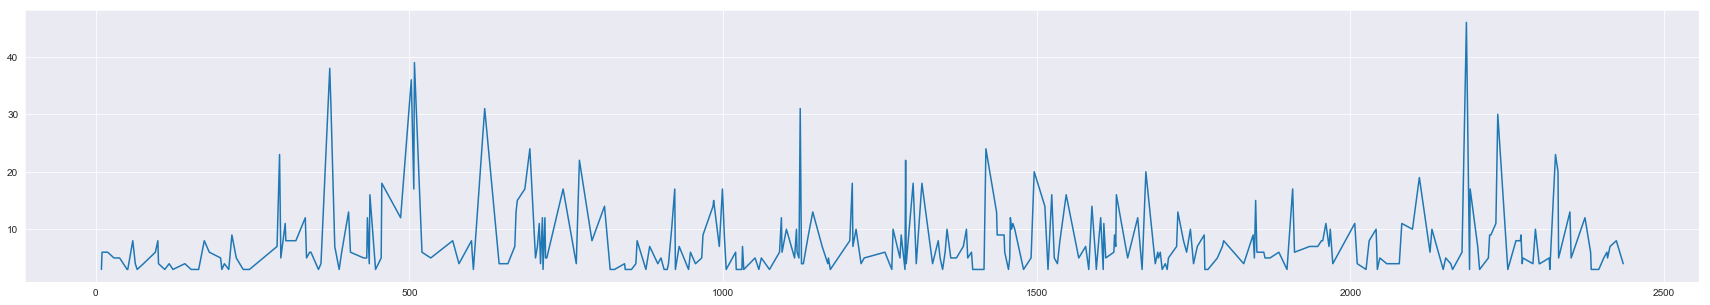

In [38]:
fig = plt.figure(figsize=(30,5))
plt.plot(v1.index,v1)

In [42]:
df_li = []
for date,file_li in file_dict.items():
    df = pd.read_csv('../data/chengdu2/'+file_li[0], sep=',',usecols=['hour', 'longitude', 'latitude', 'value'])
    df['DATE'] = date
    df_li.append(df)

In [43]:
use_df = pd.concat(df_li)

,hour,longitude,latitude,value,DATE
0,0,104.4423,30.8644,6,2016.08.08
1,0,104.0529,30.7525,4,2016.08.08
2,0,103.6354,31.0106,8,2016.08.08
3,0,103.6420,30.9942,8,2016.08.08
4,0,104.1024,30.7293,5,2016.08.08
5,0,104.1174,30.6964,5,2016.08.08
6,0,104.1732,30.8137,11,2016.08.08
7,0,104.0705,30.6531,4,2016.08.08
8,0,104.1173,30.6758,10,2016.08.08
9,0,104.0723,30.5334,3,2016.08.08


In [51]:
use_df['FULL_DATE'] = use_df.apply(lambda x: "%s %s" % (x['DATE'], x['hour']) if x['hour']>=10 else "%s 0%s" % (x['DATE'], x['hour']), axis=1)

In [53]:
use_df

,hour,longitude,latitude,value,DATE,FULL_DATE
0,0,104.4423,30.8644,6,2016.08.08,2016.08.08 00
1,0,104.0529,30.7525,4,2016.08.08,2016.08.08 00
2,0,103.6354,31.0106,8,2016.08.08,2016.08.08 00
3,0,103.6420,30.9942,8,2016.08.08,2016.08.08 00
4,0,104.1024,30.7293,5,2016.08.08,2016.08.08 00
5,0,104.1174,30.6964,5,2016.08.08,2016.08.08 00
6,0,104.1732,30.8137,11,2016.08.08,2016.08.08 00
7,0,104.0705,30.6531,4,2016.08.08,2016.08.08 00
8,0,104.1173,30.6758,10,2016.08.08,2016.08.08 00
9,0,104.0723,30.5334,3,2016.08.08,2016.08.08 00


In [62]:
# real = use_df[(use_df['longitude']>=103.959993) & (use_df['longitude']>=30.575031) & (use_df['latitude']<=103.968985) & (use_df['latitude']<=30.587156)]
 real = use_df[(use_df['longitude']>=103.959993) & (use_df['longitude']>=30.575031) & (use_df['latitude']<=103.960000) & (use_df['latitude']<=30.580000)]

In [68]:
vis_se = real.groupby('FULL_DATE')['value'].sum()

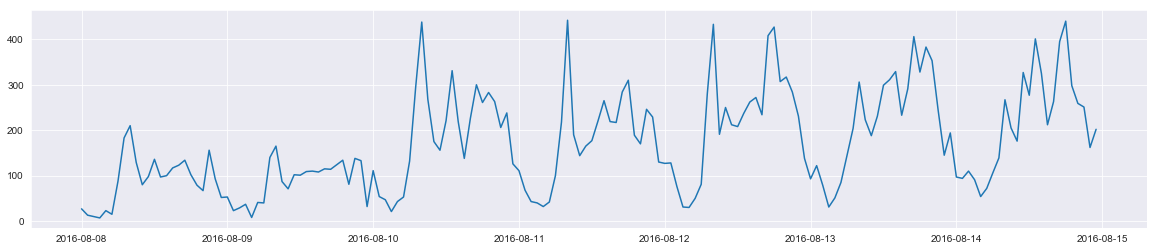

In [70]:
fig = plt.figure(figsize=(20,4))
plt.plot(pd.to_datetime(vis_se.index), vis_se)